In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

# 1

## Function:  get_sequences_from_file(fasta_fn)
### Description: 
extract the species name and DNA sequence from a fasta file
### Arguments:
fasta_fn: a fasta file
### Return: 
A dictionary file. 'Key' is species_name which are from the second and third word in fasta file description. 'Value' is DNA sequence of each species.

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}  # create an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()  # extract record description
        species_name = description[1] + " " + description[2] # extract the second and third word from description
        sequence_data_dict[species_name] = record.seq  # extract DNA sequence and add it to species name
    return(sequence_data_dict)

# 2

In [4]:
def translate_function1(value):
    standard_table = CodonTable.unambiguous_dna_by_name['Standard']  # use the standard codon in Biopython
    dna_sequence = str(value)  # define DNA seq as string
    protein_sequence = ''  # to store aa seq
    for i in range(0, len(dna_sequence), 3):
        codon = dna_sequence[i:i+3]  # select each 3 base as a codon
        amino_acid = standard_table.forward_table.get(codon, '*') # get an amino acid
        protein_sequence += amino_acid  # get protein sequence
    row = protein_sequence
    print(row)
    return row      

In [5]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

for key, value in cytb_seqs.items():
    aa_seq = translate_function1(value)
print(aa_seq)

MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAIHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGFYYGSYLYKET*NTGIILLLTLMATAFVGYVLP*GQISF*GATVITNLFSAIPYIGQTLVEWT*GGFSVDNPTLTRFFALHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALILLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPE*YFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTIAFRPLSQLLF*ALVANLIILT*VGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKILNH*
MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAIHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGFYYGSYLYKET*NTGIILLLTLIATAFVGYVLPWGQISF*GATVITNLFSAIPYIGQTLVE*A*GGFSVDNPTLTRFFALHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALILLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPE*YFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTITFRPLSQLLF*TLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKILNH*
MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGLYYGSYLYKET*NTGIILLLTLIATAFVGYVLP*GQISF*GATVITNLFSAIPYIGQTLVEWA*GGFSVDNPTLTRFFTLHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFILL

# 3

In [6]:
fasta_fn = open("penguins_cytb.fasta", "r") 
    
def translation_file(fasta_fn): 
    data=[]  # create a list to store loop item
    records = SeqIO.parse(fasta_fn, "fasta")  # sparse fasta_fn file with Biopython
    for record in records:     
        # Extract the DNA sequence and translation
        dna_seq = record.seq
        aa_seq = dna_seq.translate()
        # change name
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        # define the variable and items in column
        row = {'species': str(species_name), 'seq': str(aa_seq)}
        data.append(row)
    df = pd.DataFrame(data)
    return df
        
results_translation2 = translation_file(fasta_fn)
print(results_translation2)

                    species                                                seq
0      Aptenodytes forsteri  MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQI...
1   Aptenodytes patagonicus  MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQI...
2       Eudyptes chrysocome  MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLGICLATQI...
3     Eudyptes chrysolophus  MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLGICLATQI...
4         Eudyptes sclateri  MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLGICLATQI...
5           Eudyptula minor  MAPNLRKSHPLLKIINNSLIDLPTPSNIST**NFGSLLGICLITQI...
6        Pygoscelis adeliae  MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQI...
7     Pygoscelis antarctica  MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQI...
8          Pygoscelis papua  MAPNLRKSHPLLKIINKSLIDLPTPPNISA**NFGSLLGICLITQI...
9       Spheniscus demersus  MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLGICLATQI...
10     Spheniscus humboldti  MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLSICLATQI...
11  Spheniscus magellanicus  MAPNLRKSHPLLKTINNSLIDLP

# 4

In [7]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [8]:
def calculate_molecular_weight1(value):
    aa_seq = str(value.translate())   #translate DNA seq to aa seq, and define aa seq as string
    aa_seq = aa_seq.replace('*', '')   #remove stop codon in aa seq
    #calculate the aa seq weight
    analysis = ProteinAnalysis(aa_seq)
    molecular_weight = analysis.molecular_weight()
    # set variable in the list and add items in each variable
    row = molecular_weight
    print(row)
    return row 

In [9]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

for key, value in cytb_seqs.items():
    aa_seq_weight = calculate_molecular_weight1(value)
print(aa_seq_weight)

40471.2343
40743.510399999985
40709.49419999999
40865.67809999998
40709.49419999999
40335.1015
40674.49449999999
40193.8878
40403.25979999999
40238.9329
40206.93589999999
40266.986
40266.986


# 5

In [10]:
def GC_content1(value): 
    dna_seq = value  # Extract the DNA sequence and translation
    # count GC 
    GC_count = dna_seq.count('G') + dna_seq.count('C')  # count the number of 'G' and 'C'
    GC_contnt = GC_count / len(dna_seq)   # the proportion of 'G' and 'C'
    row = GC_contnt
    print(row)
    return row 

In [11]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

for key, value in cytb_seqs.items():
    seq_GC = GC_content1(value)
print(seq_GC)

0.48381452318460194
0.4969378827646544
0.5118110236220472
0.5091863517060368
0.5083114610673666
0.4925634295713036
0.49081364829396323
0.4776902887139108
0.4715660542432196
0.48293963254593175
0.4925634295713036
0.4820647419072616
0.4820647419072616


# 6

In [12]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 

import numpy as np

# add another two columns and 'NaN' as empty cell
penguins_df['molecular weight'] = np.nan
penguins_df['GC content'] = np.nan
print(penguins_df)

                    species   mass  molecular weight  GC content
0      Aptenodytes forsteri  28.00               NaN         NaN
1   Aptenodytes patagonicus  13.40               NaN         NaN
2       Eudyptes chrysocome   2.80               NaN         NaN
3     Eudyptes chrysolophus   4.50               NaN         NaN
4         Eudyptes sclateri   4.25               NaN         NaN
5           Eudyptula minor   1.60               NaN         NaN
6        Pygoscelis adeliae   4.60               NaN         NaN
7     Pygoscelis antarctica   4.10               NaN         NaN
8          Pygoscelis papua   6.10               NaN         NaN
9       Spheniscus demersus   3.20               NaN         NaN
10     Spheniscus humboldti   4.75               NaN         NaN
11  Spheniscus magellanicus   3.40               NaN         NaN


# 7

In [13]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

weight = [] # add new 'weight' column
GC = []  # add new 'GC' column
for key, value in cytb_seqs.items():
    aa_seq = translate_function1(cytb_seqs)   # use the function
    aa_seq_weight = calculate_molecular_weight1(value)  # use the funtion
    seq_GC = GC_content1(value)   # use the function
    weight.append(aa_seq_weight)
    GC.append(seq_GC)
# fill the two columns of penguins_df
penguins_df['molecular weight'] = weight
penguins_df['GC content'] = GC

penguins_df1 = penguins_df
print (penguins_df1)
    

**********MAPNLRKSHPLLKIINNS**************MAPNLRKSHPLLKIINNS*************WPPTSENPTPS*KQSIT**************MAPNLRKSHPLLKTINNS************MAPNLRKSHPLLKTINNS************GPQPPKISPPPKNNQQL*************WPPTSENPTLS*K*LTT**************MAPNLRKSHPLLKIINNS************WPPTFENPTLS*K*STN**************GPQPPKIPPSPKNNQQL**************GPQPPKIPPSPKNNQQL***************GPQPPKIPPSPKNNQQL****
40471.2343
0.48381452318460194
**********MAPNLRKSHPLLKIINNS**************MAPNLRKSHPLLKIINNS*************WPPTSENPTPS*KQSIT**************MAPNLRKSHPLLKTINNS************MAPNLRKSHPLLKTINNS************GPQPPKISPPPKNNQQL*************WPPTSENPTLS*K*LTT**************MAPNLRKSHPLLKIINNS************WPPTFENPTLS*K*STN**************GPQPPKIPPSPKNNQQL**************GPQPPKIPPSPKNNQQL***************GPQPPKIPPSPKNNQQL****
40743.510399999985
0.4969378827646544
**********MAPNLRKSHPLLKIINNS**************MAPNLRKSHPLLKIINNS*************WPPTSENPTPS*KQSIT**************MAPNLRKSHPLLKTINNS************MAPNLRKSHPLLKTINNS************GPQPPKISPPPKNNQQL********

# 8

##      a. What is the smallest penguin species? 
Eudyptula minor is the smallest.

##      b. What is the geographical range of this species?

<function matplotlib.pyplot.show(close=None, block=None)>

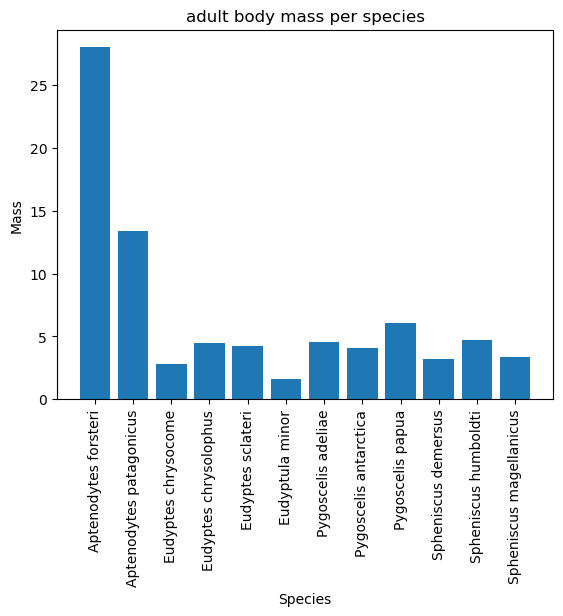

In [14]:
import matplotlib.pyplot as plt

penguins_df = pd.read_csv("penguins_mass.csv")
plt.bar(penguins_df['species'], penguins_df['mass'])

#plot a bar chart
plt.xlabel('Species')
plt.xticks(rotation=90)
plt.ylabel('Mass')
plt.title('adult body mass per species')

plt.show

# 9

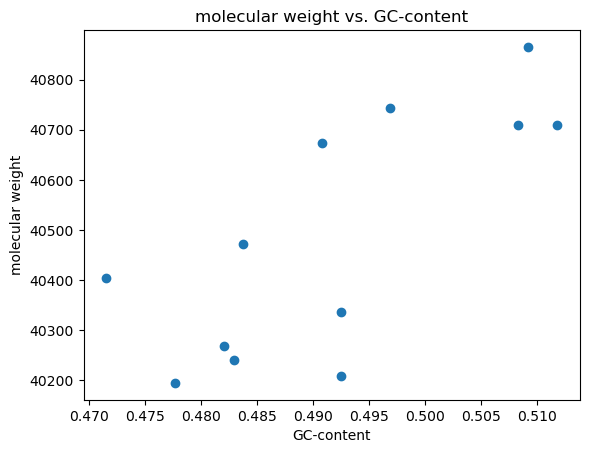

In [16]:
weight = penguins_df1['molecular weight']
GC = penguins_df1['GC content']

# Plot the data as a scatter plot
plt.scatter(GC, weight)
plt.ylabel('molecular weight')
plt.xlabel('GC-content')
plt.title('molecular weight vs. GC-content')
plt.show()

# 10

In [15]:
penguins_df1.to_csv('merged_penguins_df.csv', index=False)

# 11
a plot shows the molecular weight as a function of body mass

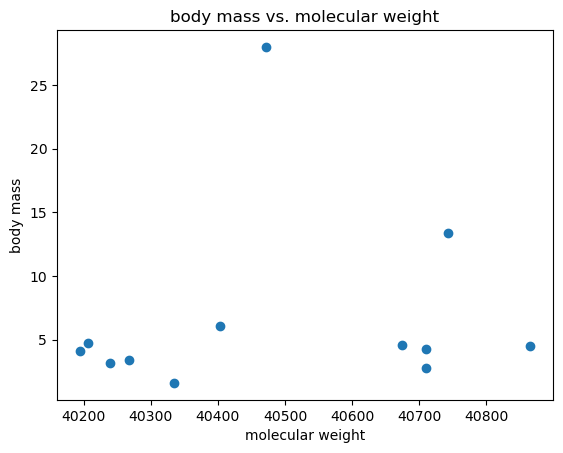

In [17]:
weight = penguins_df1['molecular weight']
mass = penguins_df1['mass']

# Plot the data as a scatter plot
plt.scatter(weight, mass)
plt.xlabel('molecular weight')
plt.ylabel('body mass')
plt.title('body mass vs. molecular weight')
plt.show()